In [1]:
%matplotlib nbagg

In [2]:
import matplotlib.pyplot as plt

In [3]:
import requests

In [4]:
from ncempy.io import dm

In [5]:
pacbed = dm.dmReader("/home/alex/source/PACBED-CNN/webapi/PACBED-CNN-data/Measured_PACBED/PACBED_0.dm4")

<IPython.core.display.Javascript object>


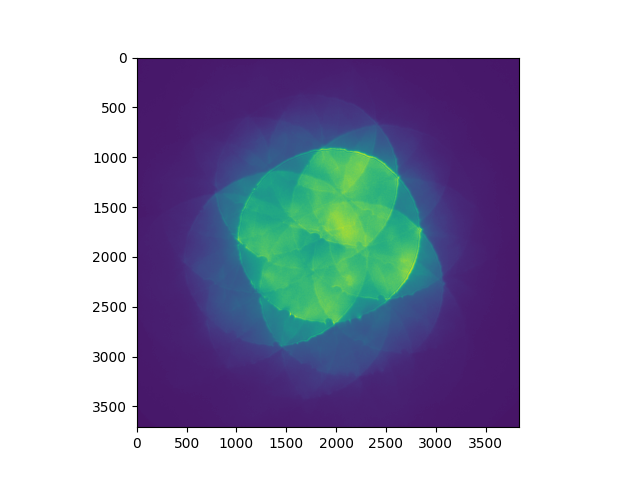

In [6]:
fig, ax = plt.subplots(1)
ax.imshow(pacbed['data'])

In [7]:
import json
import logging

In [8]:
if False:
    from http.client import HTTPConnection
    HTTPConnection.debuglevel = 1
    logging.basicConfig() # you need to initialize logging, otherwise you will not see anything from requests
    logging.getLogger().setLevel(logging.DEBUG)
    requests_log = logging.getLogger("urllib3")
    requests_log.setLevel(logging.DEBUG)
    requests_log.propagate = True

In [9]:
pacbed['data'].dtype

dtype('float32')

In [18]:
resp = requests.post("http://localhost:8000/inference/", files={
    "file": ("pacbed.raw", bytes(pacbed['data']), "application/octet-stream"),
    "parameters": (None, json.dumps({
        "dtype": str(pacbed['data'].dtype),
        "width": pacbed['data'].shape[1],
        "height": pacbed['data'].shape[0],
        "physical_params": {
            "acceleration_voltage": 80000,
            "zone_axis": {"u": 0, "v": 0, "w": 1},
            "crystal_structure": "Rutile",
            "convergence_angle": 20,
        }
    }), "application/json"), 
}, )

In [19]:
 resp.json()

{'thickness': 100.0, 'mistilt': 7.0, 'scale': 0.9820195281026053}